In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the dataset CSV file

### Problem 1

***A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following .csv file: Fever.csv***

In [119]:
df1 = pd.read_csv('Fever-1.csv')

# Checking the top 5 records

In [120]:
df1.head()

A  B  Volunteer  Relief
0  1  1          1     2.4
1  1  1          2     2.7
2  1  1          3     2.3
3  1  1          4     2.5
4  1  2          1     4.6

In [121]:
df1.describe(include='all')

A          B  Volunteer     Relief
count  36.000000  36.000000  36.000000  36.000000
mean    2.000000   2.000000   2.500000   7.183333
std     0.828079   0.828079   1.133893   3.272090
min     1.000000   1.000000   1.000000   2.300000
25%     1.000000   1.000000   1.750000   4.675000
50%     2.000000   2.000000   2.500000   6.000000
75%     3.000000   3.000000   3.250000   9.325000
max     3.000000   3.000000   4.000000  13.500000

# Checking the shape, information and Data types of the dataframe

In [122]:
df1.shape

(36, 4)

In [123]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [124]:
df1.dtypes

A              int64
B              int64
Volunteer      int64
Relief       float64
dtype: object

# Checking for any null values

In [125]:
df1.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

In [157]:
df1.A = pd.Categorical(df1.A)

In [158]:
df1.B = pd.Categorical(df1.B)

In [159]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   A          36 non-null     category
 1   B          36 non-null     category
 2   Volunteer  36 non-null     int64   
 3   Relief     36 non-null     float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 1.0 KB


**1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually.**

##### Null and Alternative Hypothesis for Ingredient A
H0 : mu(A_L1) = mu(A_L2) = mu(A_L3)
H1 : mu(A_L1) =! mu(A_L2) =! mu(A_L3) or mu(A_L1) = mu(A_L2) =! mu(l3) or mu(A_L1) =! mu(A_L2) = mu(A_L3)

𝐻0 : The mean hours required by volunteers for relief is equal with respect to the amount of ingredients A at each level.
𝐻1 : The means hours required by volunteers for relief varies with respect to the amount of ingredients A at each level.

##### Null and Alternative Hypothesis for Ingredient B
H0 : mu(B_L1) = mu(B_L2) = mu(B_L3)
H1 : mu(B_L1) =! mu(B_L2) =! mu(B_L3) or mu(B_L1) = mu(B_L2) =! mu(l3) or mu(B_L1) =! mu(B_L2) = mu(B_L3)

𝐻0 : The means hours required by volunteers for relief is equal with respect to the amount of ingredients B at each level.
𝐻1 : The means hours required by volunteers for relief varies with respect to the amount of ingredients B at each level.

**Dropping the column 'Volunteer' since it is not needed for ANOVA**

In [160]:
df1.drop(columns="Volunteer")

A  B  Relief
0   1  1     2.4
1   1  1     2.7
2   1  1     2.3
3   1  1     2.5
4   1  2     4.6
5   1  2     4.2
6   1  2     4.9
7   1  2     4.7
8   1  3     4.8
9   1  3     4.5
10  1  3     4.4
11  1  3     4.6
12  2  1     5.8
13  2  1     5.2
14  2  1     5.5
15  2  1     5.3
16  2  2     8.9
17  2  2     9.1
18  2  2     8.7
19  2  2     9.0
20  2  3     9.1
21  2  3     9.3
22  2  3     8.7
23  2  3     9.4
24  3  1     6.1
25  3  1     5.7
26  3  1     5.9
27  3  1     6.2
28  3  2     9.9
29  3  2    10.5
30  3  2    10.6
31  3  2    10.1
32  3  3    13.5
33  3  3    13.0
34  3  3    13.3
35  3  3    13.2

In [161]:
import scipy.stats as stats
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

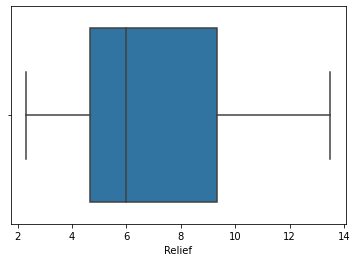

In [162]:
sns.boxplot(df1.Relief)
plt.show()

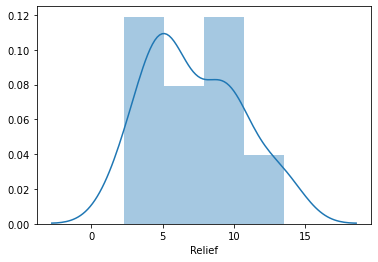

In [163]:
sns.distplot(df1.Relief)

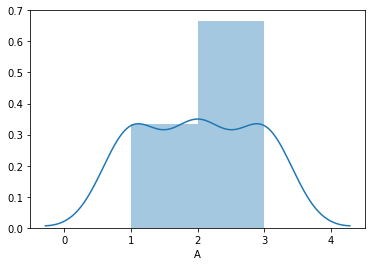

In [164]:
sns.distplot(df1.A)

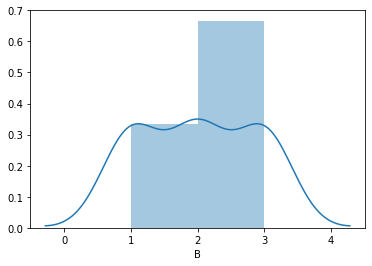

In [165]:
sns.distplot(df1.B)

In [132]:
# 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. 
#State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [166]:
formula = 'Relief ~C(A)'
model = ols(formula, df1).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


**The P-value is less than 0.05, so we reject the null hypothesis. So for at least one pair the
mean relief times are not equal in case of Ingredient A.**

In [134]:
#1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. 
#State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [167]:
formula = 'Relief ~C(B)'
model = ols(formula, df1).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


**The P-value is less than 0.05, so we reject the null hypothesis. So for at least one pair the mean relief times are not equal in case of Ingredient B**



In [136]:
#1.4) Analyse the effects of one variable on another with the help of an interaction plot.
#What is an interaction between two treatments?
#[hint: use the ‘pointplot’ function from the ‘seaborn’ function]


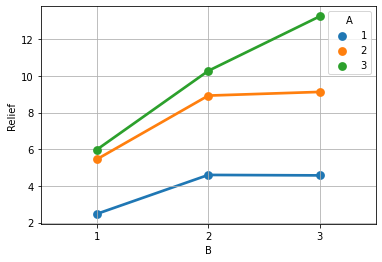

In [168]:
sns.pointplot(x='B', y='Relief', data=df1, hue='A', ci=None)
plt.grid()
plt.show()

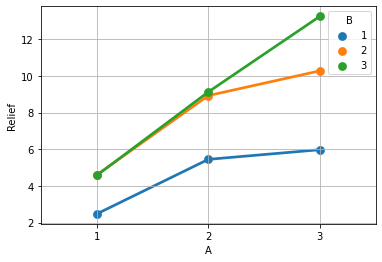

In [169]:
sns.pointplot(x='A', y='Relief', data=df1, hue='B', ci=None)
plt.grid()
plt.show()

**Looking at the above plots, it seems there is interaction between levels 1, 2 and 3 in both A and B ingredients. Level 1 has high interaction with levels 2 and 3 in both variables.**
**Overall interaction among the two treatment variables are high.**

1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’) with the variable 'Relief' and state your results.

In [170]:
#Interaction Effect:
model=ols('Relief ~ C(A) + C(B) + C(A)*C(B)',data=df1).fit()
aov_table=anova_lm(model, typ=2)
print(aov_table)

            sum_sq    df            F        PR(>F)
C(A)       220.020   2.0  1827.858462  1.514043e-29
C(B)       123.660   2.0  1027.329231  3.348751e-26
C(A):C(B)   29.425   4.0   122.226923  6.972083e-17
Residual     1.625  27.0          NaN           NaN


In [179]:
formula = 'Relief ~ C(A) + C(B)'
model = ols(formula, df1).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

          sum_sq    df           F        PR(>F)
C(A)      220.02   2.0  109.832850  8.514029e-15
C(B)      123.66   2.0   61.730435  1.546749e-11
Residual   31.05  31.0         NaN           NaN


In [180]:
formula = 'Relief ~ C(B) + C(A)'
model = ols(formula, df1).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

          sum_sq    df           F        PR(>F)
C(B)      123.66   2.0   61.730435  1.546749e-11
C(A)      220.02   2.0  109.832850  8.514029e-15
Residual   31.05  31.0         NaN           NaN


In [171]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Relief   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     774.9
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           7.71e-30
Time:                        23:02:26   Log-Likelihood:                 4.6824
No. Observations:                  36   AIC:                             8.635
Df Residuals:                      27   BIC:                             22.89
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.4750      0.123     20.177      0.000       2.223       2.727
C(A)[T.2]               2.9750      0.173     17.150      0.000       2.619       3.331
C(A)[T.3]               3.5000      0.173     20.176      0.000       3.144       3.856
C(B)[T.2]               2.1250      0.173     12.250      0.000       1.769       2.481
C(B)[T.3]               2.1000      0.173     12.106      0.000       1.744       2.456
C(A)[T.2]:C(B)[T.2]     1.3500      0.245      5.503      0.000       0.847       1.853
C(A)[T.3]:C(B)[T.2]     2.1750      0.245      8.866      0.000       1.672       2.678
C(A)[T.2]:C(B)[T.3]     1.5750      0.245      6.420      0.000       1.072       2.078
C(A)[T.3]:C(B)[T.3]     5.1750      0.245     21.094      0.000       4.672       5.678
==============================================================================
Omnibus:                        2.525   Durbin-Watson:                   2.930
Prob(Omnibus):                  0.283   Jarque-Bera (JB):                1.520
Skew:                          -0.224   Prob(JB):                        0.468
Kurtosis:                       2.098   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
print(model.fvalue, model.f_pvalue)

774.9103846153844 7.710504253731319e-30


In [173]:
mc = MultiComparison(df1.Relief, df1.A)

In [174]:
result = mc.tukeyhsd()

In [175]:
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2     3.95  0.001  1.7814 6.1186   True
     1      3     5.95  0.001  3.7814 8.1186   True
     2      3      2.0 0.0755 -0.1686 4.1686  False
---------------------------------------------------


In [176]:
mc2 = MultiComparison(df1.Relief, df1.B)

In [177]:
result2 = mc2.tukeyhsd()

In [178]:
print(result2)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2      3.3 0.0164  0.5374 6.0626   True
     1      3     4.35 0.0014  1.5874 7.1126   True
     2      3     1.05 0.6164 -1.7126 3.8126  False
---------------------------------------------------


#### In both comparisons above of Relief variable  with A and B variables, we can see that there is significant interaction between levels 2 an 3 in both A and B variables with Relief mean times.

In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df2 = pd.read_csv('Education - Post 12th Standard-1.csv')


In [3]:
df2.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [4]:
df2.shape

(777, 18)

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [6]:
df2.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [7]:
df2.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [8]:
df2.describe(include='all')

Names          Apps        Accept       Enroll  \
count                  777    777.000000    777.000000   777.000000   
unique                 777           NaN           NaN          NaN   
top     Dillard University           NaN           NaN          NaN   
freq                     1           NaN           NaN          NaN   
mean                   NaN   3001.638353   2018.804376   779.972973   
std                    NaN   3870.201484   2451.113971   929.176190   
min                    NaN     81.000000     72.000000    35.000000   
25%                    NaN    776.000000    604.000000   242.000000   
50%                    NaN   1558.000000   1110.000000   434.000000   
75%                    NaN   3624.000000   2424.000000   902.000000   
max                    NaN  48094.000000  26330.000000  6392.000000   

         Top10perc   Top25perc   F.Undergrad   P.Undergrad      Outstate  \
count   777.000000  777.000000    777.000000    777.000000    777.000000   
unique         NaN         NaN           NaN           NaN           NaN   
top            NaN         NaN           NaN           NaN           NaN   
freq           NaN         NaN           NaN           NaN           NaN   
mean     27.558559   55.796654   3699.907336    855.298584  10440.669241   
std      17.640364   19.804778   4850.420531   1522.431887   4023.016484   
min       1.000000    9.000000    139.000000      1.000000   2340.000000   
25%      15.000000   41.000000    992.000000     95.000000   7320.000000   
50%      23.000000   54.000000   1707.000000    353.000000   9990.000000   
75%      35.000000   69.000000   4005.000000    967.000000  12925.000000   
max      96.000000  100.000000  31643.000000  21836.000000  21700.000000   

         Room.Board        Books     Personal         PhD    Terminal  \
count    777.000000   777.000000   777.000000  777.000000  777.000000   
unique          NaN          NaN          NaN         NaN         NaN   
top             NaN          NaN          NaN         NaN         NaN   
freq            NaN          NaN          NaN         NaN         NaN   
mean    4357.526384   549.380952  1340.642214   72.660232   79.702703   
std     1096.696416   165.105360   677.071454   16.328155   14.722359   
min     1780.000000    96.000000   250.000000    8.000000   24.000000   
25%     3597.000000   470.000000   850.000000   62.000000   71.000000   
50%     4200.000000   500.000000  1200.000000   75.000000   82.000000   
75%     5050.000000   600.000000  1700.000000   85.000000   92.000000   
max     8124.000000  2340.000000  6800.000000  103.000000  100.000000   

         S.F.Ratio  perc.alumni        Expend  Grad.Rate  
count   777.000000   777.000000    777.000000  777.00000  
unique         NaN          NaN           NaN        NaN  
top            NaN          NaN           NaN        NaN  
freq           NaN          NaN           NaN        NaN  
mean     14.089704    22.743887   9660.171171   65.46332  
std       3.958349    12.391801   5221.768440   17.17771  
min       2.500000     0.000000   3186.000000   10.00000  
25%      11.500000    13.000000   6751.000000   53.00000  
50%      13.600000    21.000000   8377.000000   65.00000  
75%      16.500000    31.000000  10830.000000   78.00000  
max      39.800000    64.000000  56233.000000  118.00000

In [9]:
# Check for duplicate data

dups = df2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [12]:
df3 = df2.copy()

## Univariate Analysis

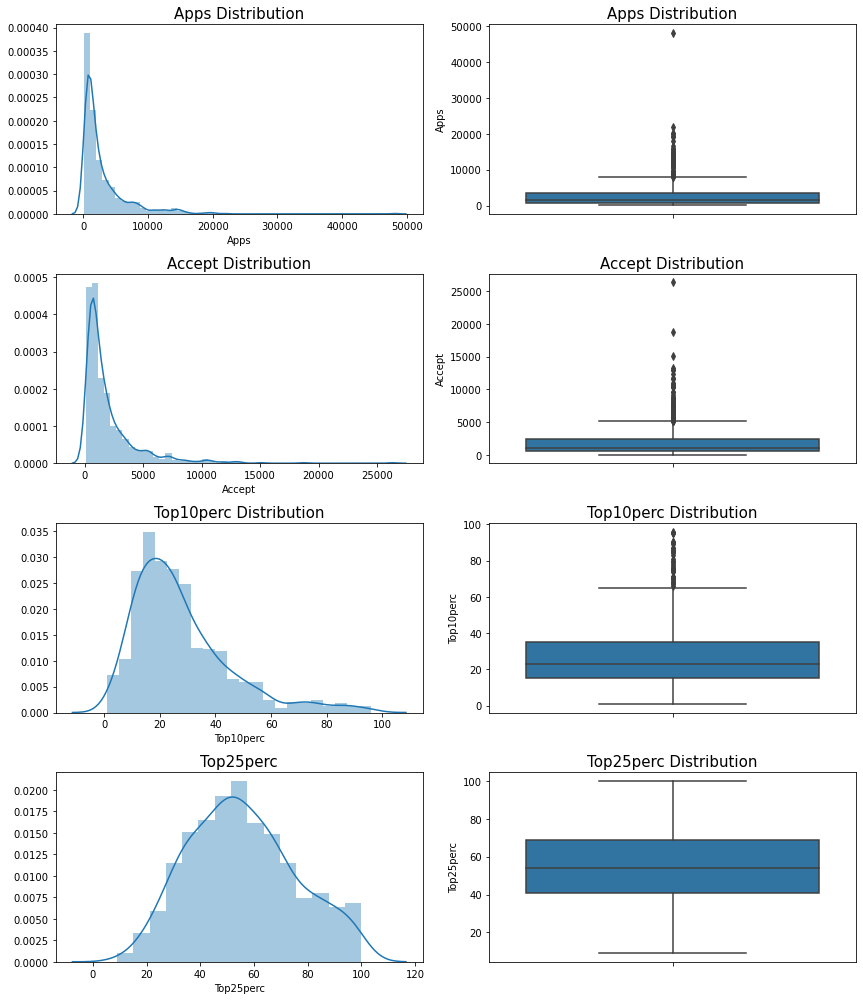

In [13]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(df2['Apps'] , ax=axes[0][0])
a.set_title("Apps Distribution",fontsize=15)

a = sns.boxplot(df2['Apps'] , orient = "v" , ax=axes[0][1])
a.set_title("Apps Distribution",fontsize=15)

a = sns.distplot(df2['Accept'] , ax=axes[1][0])
a.set_title("Accept Distribution",fontsize=15)

a = sns.boxplot(df2['Accept'] , orient = "v" , ax=axes[1][1])
a.set_title("Accept Distribution",fontsize=15)

a = sns.distplot(df2['Top10perc'] , ax=axes[2][0])
a.set_title("Top10perc Distribution",fontsize=15)

a = sns.boxplot(df2['Top10perc'] , orient = "v" , ax=axes[2][1])
a.set_title("Top10perc Distribution",fontsize=15)


a = sns.distplot(df2['Top25perc'] , ax=axes[3][0])
a.set_title("Top25perc",fontsize=15)

a = sns.boxplot(df2['Top25perc'] , orient = "v" , ax=axes[3][1])
a.set_title("Top25perc Distribution",fontsize=15)

plt.tight_layout()
plt.show()

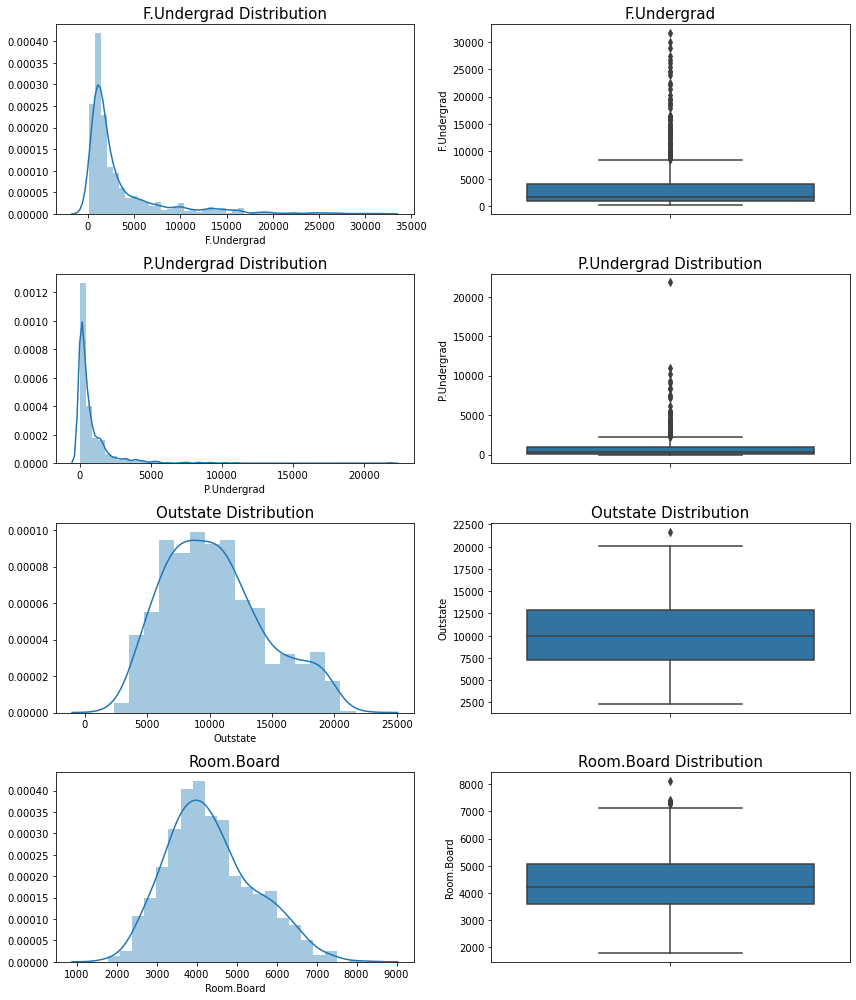

In [14]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(df2['F.Undergrad'] , ax=axes[0][0])
a.set_title("F.Undergrad Distribution",fontsize=15)

a = sns.boxplot(df2['F.Undergrad'] , orient = "v" , ax=axes[0][1])
a.set_title("F.Undergrad",fontsize=15)

a = sns.distplot(df2['P.Undergrad'] , ax=axes[1][0])
a.set_title("P.Undergrad Distribution",fontsize=15)

a = sns.boxplot(df2['P.Undergrad'] , orient = "v" , ax=axes[1][1])
a.set_title("P.Undergrad Distribution",fontsize=15)

a = sns.distplot(df2['Outstate'] , ax=axes[2][0])
a.set_title("Outstate Distribution",fontsize=15)

a = sns.boxplot(df2['Outstate'] , orient = "v" , ax=axes[2][1])
a.set_title("Outstate Distribution",fontsize=15)


a = sns.distplot(df2['Room.Board'] , ax=axes[3][0])
a.set_title("Room.Board",fontsize=15)

a = sns.boxplot(df2['Room.Board'] , orient = "v" , ax=axes[3][1])
a.set_title("Room.Board Distribution",fontsize=15)

plt.tight_layout()
plt.show()

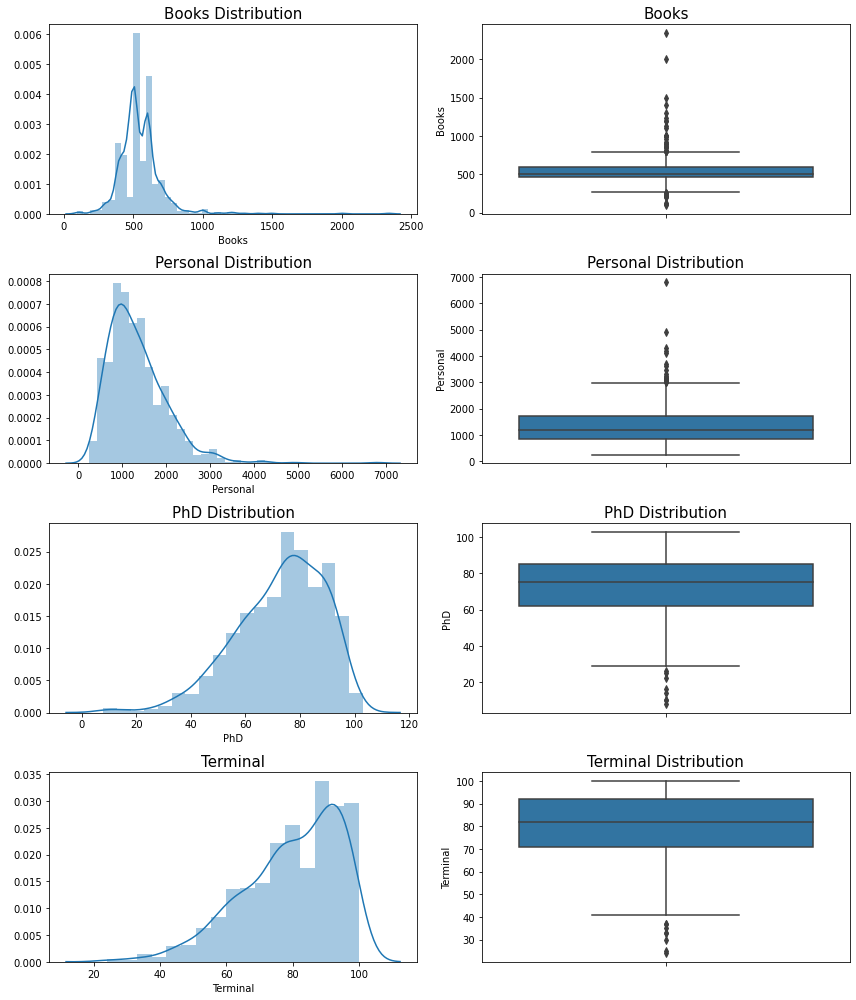

In [15]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(df2['Books'] , ax=axes[0][0])
a.set_title("Books Distribution",fontsize=15)

a = sns.boxplot(df2['Books'] , orient = "v" , ax=axes[0][1])
a.set_title("Books",fontsize=15)

a = sns.distplot(df2['Personal'] , ax=axes[1][0])
a.set_title("Personal Distribution",fontsize=15)

a = sns.boxplot(df2['Personal'] , orient = "v" , ax=axes[1][1])
a.set_title("Personal Distribution",fontsize=15)

a = sns.distplot(df2['PhD'] , ax=axes[2][0])
a.set_title("PhD Distribution",fontsize=15)

a = sns.boxplot(df2['PhD'] , orient = "v" , ax=axes[2][1])
a.set_title("PhD Distribution",fontsize=15)


a = sns.distplot(df2['Terminal'] , ax=axes[3][0])
a.set_title("Terminal",fontsize=15)

a = sns.boxplot(df2['Terminal'] , orient = "v" , ax=axes[3][1])
a.set_title("Terminal Distribution",fontsize=15)

plt.tight_layout()
plt.show()

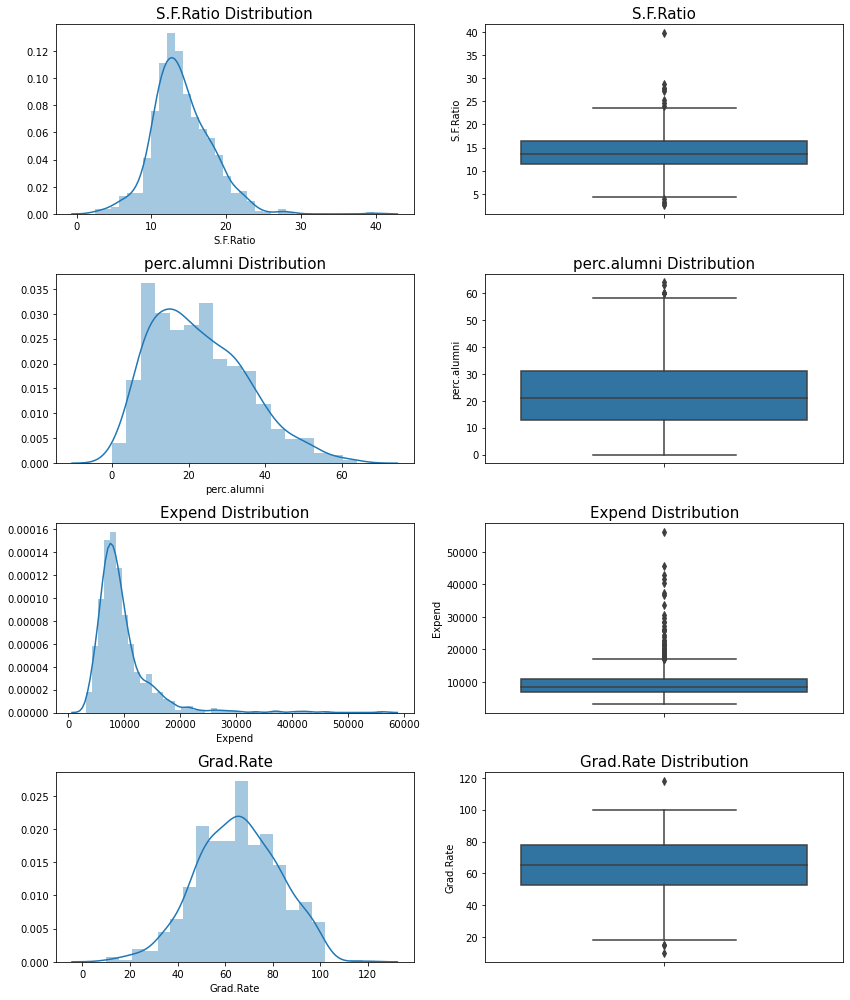

In [16]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(df2['S.F.Ratio'] , ax=axes[0][0])
a.set_title("S.F.Ratio Distribution",fontsize=15)

a = sns.boxplot(df2['S.F.Ratio'] , orient = "v" , ax=axes[0][1])
a.set_title("S.F.Ratio",fontsize=15)

a = sns.distplot(df2['perc.alumni'] , ax=axes[1][0])
a.set_title("perc.alumni Distribution",fontsize=15)

a = sns.boxplot(df2['perc.alumni'] , orient = "v" , ax=axes[1][1])
a.set_title("perc.alumni Distribution",fontsize=15)

a = sns.distplot(df2['Expend'] , ax=axes[2][0])
a.set_title("Expend Distribution",fontsize=15)

a = sns.boxplot(df2['Expend'] , orient = "v" , ax=axes[2][1])
a.set_title("Expend Distribution",fontsize=15)


a = sns.distplot(df2['Grad.Rate'] , ax=axes[3][0])
a.set_title("Grad.Rate",fontsize=15)

a = sns.boxplot(df2['Grad.Rate'] , orient = "v" , ax=axes[3][1])
a.set_title("Grad.Rate Distribution",fontsize=15)

plt.tight_layout()
plt.show()


In [17]:
from scipy.stats import shapiro

for i in df2.columns:
    if df2[i].dtype != 'object':
        stat, p_value = shapiro(df2[i])
        print('P-Value for', i, ' is ', str(p_value))

P-Value for Apps  is  6.817376668202877e-37
P-Value for Accept  is  1.7156291262643952e-36
P-Value for Enroll  is  6.460356670479904e-36
P-Value for Top10perc  is  2.4506751303874142e-23
P-Value for Top25perc  is  1.6668367663896788e-07
P-Value for F.Undergrad  is  8.190183707943287e-37
P-Value for P.Undergrad  is  2.2660397466596617e-41
P-Value for Outstate  is  4.178048965824965e-12
P-Value for Room.Board  is  6.606378555318315e-09
P-Value for Books  is  1.6500736287944575e-31
P-Value for Personal  is  8.492892282827518e-23
P-Value for PhD  is  7.842821037789063e-14
P-Value for Terminal  is  2.0385700760246856e-17
P-Value for S.F.Ratio  is  4.4927048192811014e-11
P-Value for perc.alumni  is  1.853275779367669e-12
P-Value for Expend  is  1.6428810066138064e-34
P-Value for Grad.Rate  is  0.00941859744489193


In [18]:
from scipy.stats import shapiro

for i in df2.columns:
    if df2[i].dtype != 'object':
        skew = df2[i].skew()
        print('Skewness for', i, 'is', skew.round(2))

Skewness for Apps is 3.72
Skewness for Accept is 3.42
Skewness for Enroll is 2.69
Skewness for Top10perc is 1.41
Skewness for Top25perc is 0.26
Skewness for F.Undergrad is 2.61
Skewness for P.Undergrad is 5.69
Skewness for Outstate is 0.51
Skewness for Room.Board is 0.48
Skewness for Books is 3.49
Skewness for Personal is 1.74
Skewness for PhD is -0.77
Skewness for Terminal is -0.82
Skewness for S.F.Ratio is 0.67
Skewness for perc.alumni is 0.61
Skewness for Expend is 3.46
Skewness for Grad.Rate is -0.11


## Bi- Variate Analysis:

In [19]:
# Check for correlation of variable
df2.corr(method='pearson')

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

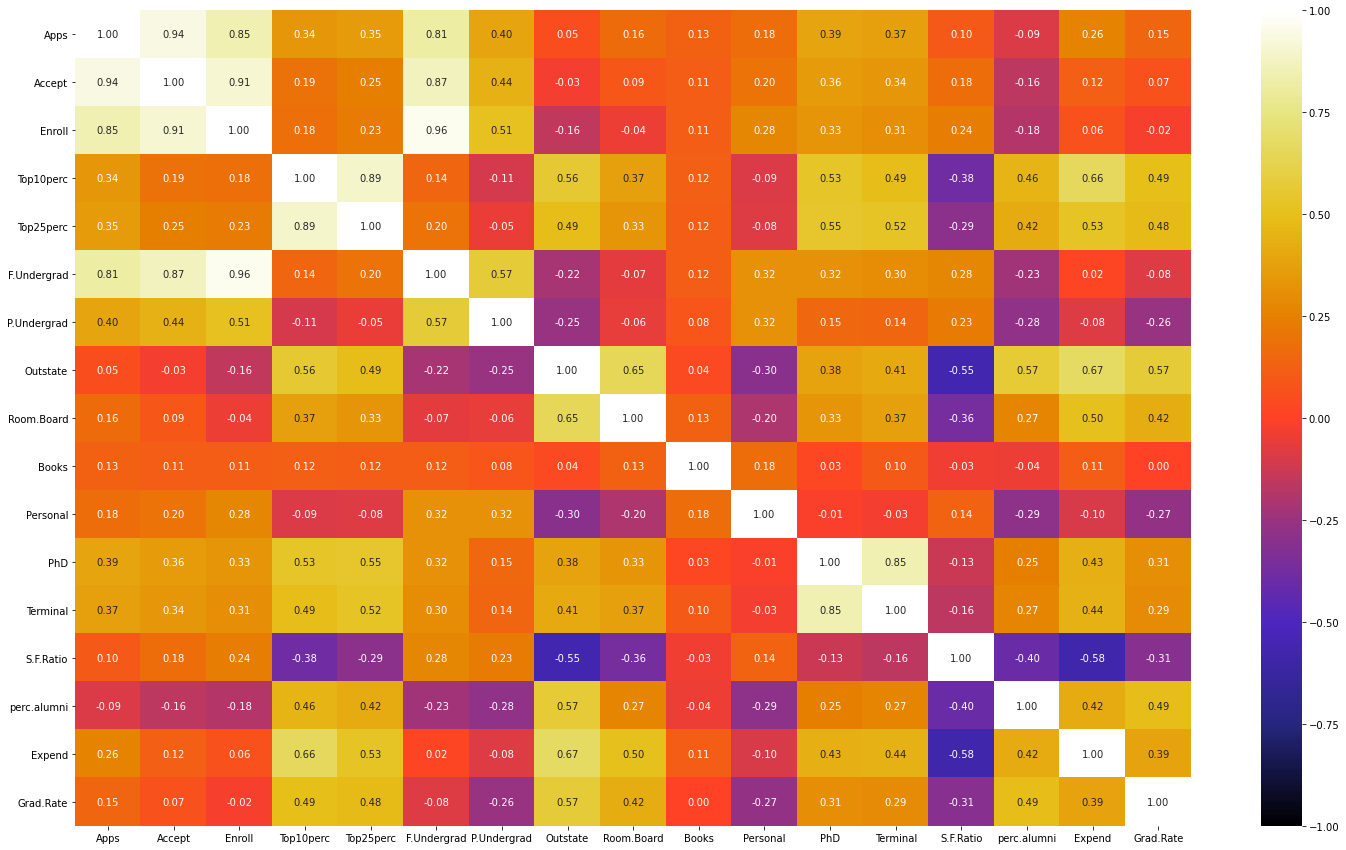

In [20]:
# plot the correlation coefficients as a heatmap
plt.subplots(figsize=(25,15))
sns.heatmap(df2.corr(), annot=True, fmt='.2f', cmap='CMRmap', vmax=1, vmin=-1)
plt.show()

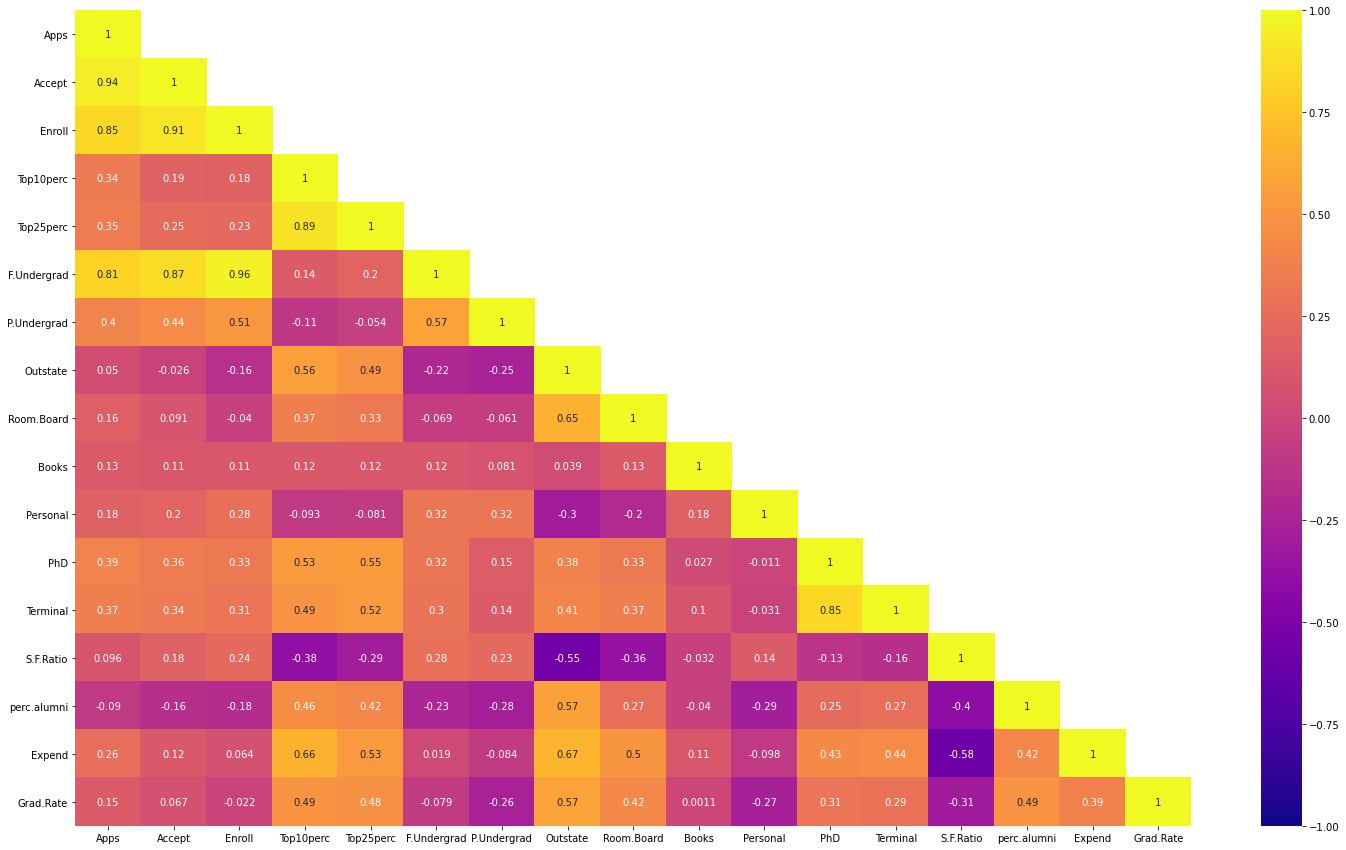

In [21]:
cor=df2.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
plt.subplots(figsize=(25,15))
sns.heatmap(cor, mask = mask, annot = True, cmap='plasma', vmin=-1, vmax=1)

In [185]:
np.cov(df2)

array([[ 5555755.10867647,  8714708.09180147,  7437574.28985294, ...,
         5826700.87698529, 13860684.70047794,  3708333.73919118],
       [ 8714708.09180147, 14265617.31117647, 12164512.03797794, ...,
         9326334.61573529, 22132214.99672794,  5896106.12856618],
       [ 7437574.28985294, 12164512.03797794, 10713274.65720589, ...,
         7834755.56272059, 19230133.32783088,  4754515.58213235],
       ...,
       [ 5826700.87698529,  9326334.61573529,  7834755.56272059, ...,
         6443211.12264706, 14780465.64897059,  4002087.63433824],
       [13860684.70047794, 22132214.99672794, 19230133.32783088, ...,
        14780465.64897059, 36759955.13470588,  9457096.74275735],
       [ 3708333.73919118,  5896106.12856618,  4754515.58213235, ...,
         4002087.63433824,  9457096.74275735,  2901347.48735294]])

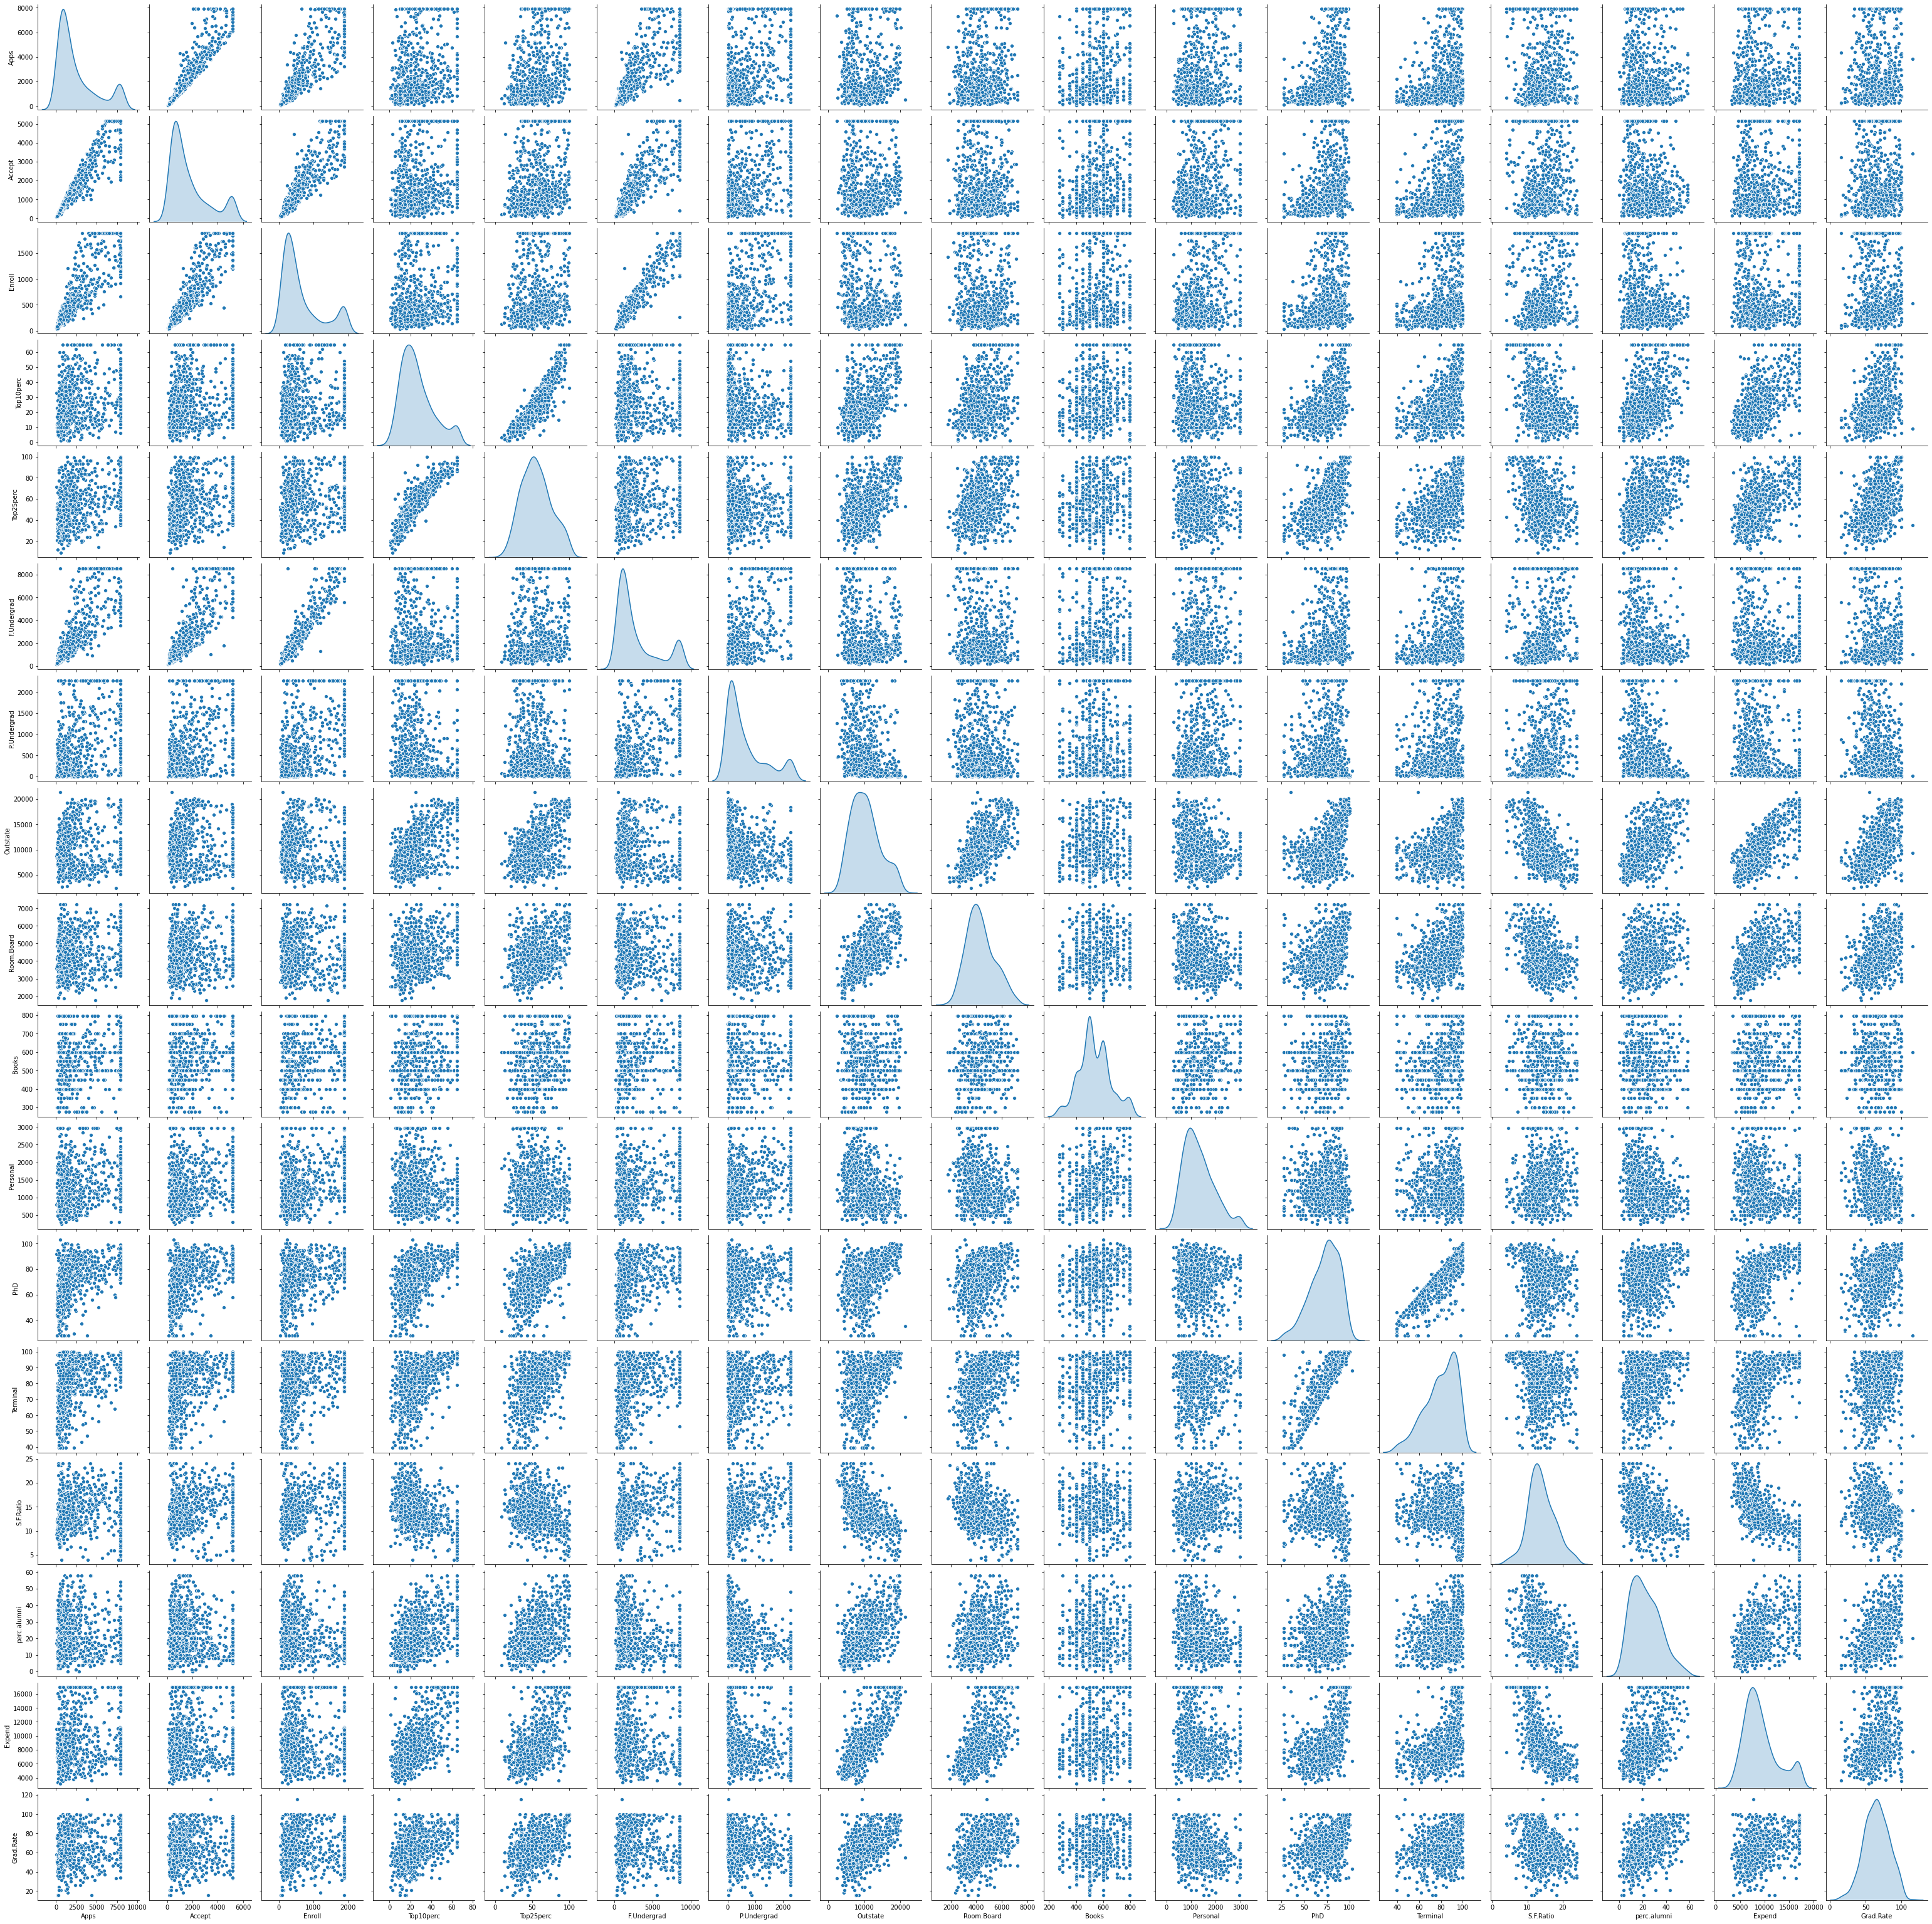

In [181]:
sns.pairplot(df2,diag_kind='kde')

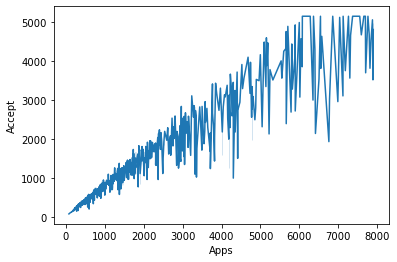

In [182]:
sns.lineplot(x= df2.Apps, y=df2.Accept)

## Checking for outliers

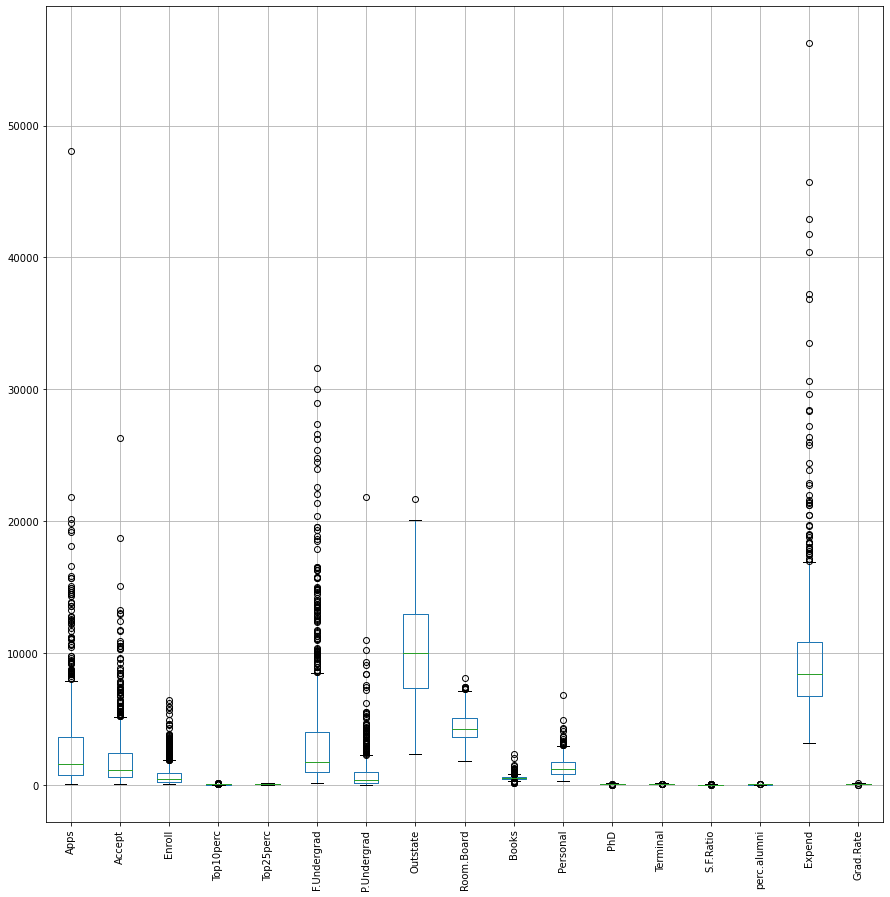

In [22]:
df2.boxplot(figsize=(15,15))
plt.xticks(rotation=90)
plt.show()

## Outlier Treatment

In [23]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [24]:
for i in df2.columns:
    if df2[i].dtype != 'object':
        lratio,uratio=remove_outlier(df2[i])
        df2[i]=np.where(df2[i]>uratio,uratio,df2[i])
        df2[i]=np.where(df2[i]<lratio,lratio,df2[i])

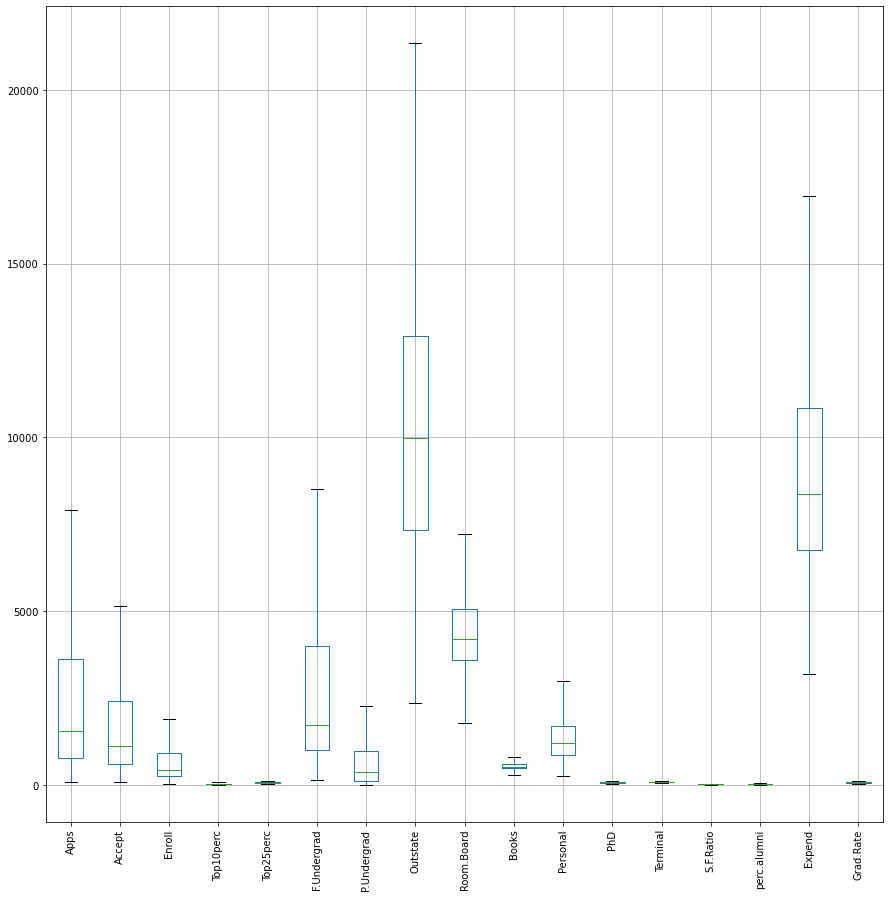

In [25]:
df2.boxplot(figsize=(15,15))
plt.xticks(rotation=90)
plt.show()

# PCA

**PCA is a statistical technique and uses orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables. PCA also is a tool to reduce multidimensional data to lower dimensions while retaining most of the information. Principal Component Analysis (PCA) is a well-established mathematical technique for reducing the dimensionality of data, while keeping as much variation as possible.**

**This PCA can only be done on continuous variables**

## Drop Names column

In [26]:
# Since Names column has unique values , so will remove it from the dataset.More over there is no point in adding ID for PCA.
df2=df2.drop(["Names"],axis=1)

In [27]:
df2.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660.0  1232.0   721.0       23.0       52.0       2885.0        537.0   
1  2186.0  1924.0   512.0       16.0       29.0       2683.0       1227.0   
2  1428.0  1097.0   336.0       22.0       50.0       1036.0         99.0   
3   417.0   349.0   137.0       60.0       89.0        510.0         63.0   
4   193.0   146.0    55.0       16.0       44.0        249.0        869.0   

   Outstate  Room.Board  Books  Personal   PhD  Terminal  S.F.Ratio  \
0    7440.0      3300.0  450.0    2200.0  70.0      78.0       18.1   
1   12280.0      6450.0  750.0    1500.0  29.0      39.5       12.2   
2   11250.0      3750.0  400.0    1165.0  53.0      66.0       12.9   
3   12960.0      5450.0  450.0     875.0  92.0      97.0        7.7   
4    7560.0      4120.0  795.0    1500.0  76.0      72.0       11.9   

   perc.alumni   Expend  Grad.Rate  
0         12.0   7041.0       60.0  
1         16.0  10527.0       56.0  
2         30.0   8735.0       54.0  
3         37.0  16948.5       59.0  
4          2.0  10922.0       15.5

In [28]:
# All variables must be on same scale, hence we can omit scaling.
# Standardization
from scipy.stats import zscore
df_new=df2.apply(zscore)
df_new.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.376493 -0.337830  0.106380  -0.246780  -0.191827    -0.018769   
1 -0.159195  0.116744 -0.260441  -0.696290  -1.353911    -0.093626   
2 -0.472336 -0.426511 -0.569343  -0.310996  -0.292878    -0.703966   
3 -0.889994 -0.917871 -0.918613   2.129202   1.677612    -0.898889   
4 -0.982532 -1.051221 -1.062533  -0.696290  -0.596031    -0.995610   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.166083 -0.746480   -0.968324 -0.776567  1.438500 -0.174045 -0.123239   
1     0.797856  0.457762    1.921680  1.828605  0.289289 -2.745731 -2.785068   
2    -0.777974  0.201488   -0.555466 -1.210762 -0.260691 -1.240354 -0.952900   
3    -0.828267  0.626954    1.004218 -0.776567 -0.736792  1.205884  1.190391   
4     0.297726 -0.716623   -0.216006  2.219381  0.289289  0.202299 -0.538069   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.070602    -0.870466 -0.630916  -0.319205  
1  -0.489511    -0.545726  0.396097  -0.552693  
2  -0.304413     0.590864 -0.131845  -0.669437  
3  -1.679429     1.159159  2.287940  -0.377577  
4  -0.568839    -1.682316  0.512468  -2.916759

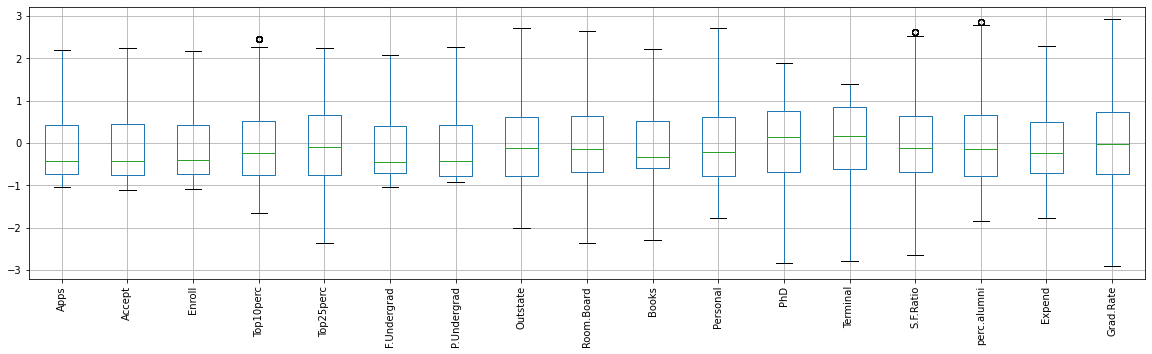

In [29]:
df_new.boxplot(figsize=(20,5))
plt.xticks(rotation=90)
plt.show()

### Statistical test to be done before PCA

#### Bartlett test of Sphericity 

Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the data.**

##### H0: All variables in the data are uncorrelated
##### Ha: At least one pair of variable in the data is correlated.

If the null hypothesis cannot be rejected then PCA is not advisable.

If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of variables in the data which are correlated hence PCA is recommended.

In [30]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_sq_value, p_value = calculate_bartlett_sphericity(df_new)
p_value

0.0

### KMO Test
The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, if MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [31]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df_new)
print(kmo_model)

0.8494624668231401


D:\PYTHON\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [32]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(df_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-

In [33]:
#Even if we take the transpose of the covariance matrix it results in same value as that of the above
cov_matrix = np.cov(df_new.T).T
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-01

## Comparing Correlation and Covariance Matrix

In [34]:
df_new.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.955307  0.896883   0.321342   0.364491     0.861002   
Accept       0.955307  1.000000  0.935277   0.223298   0.273681     0.897034   
Enroll       0.896883  0.935277  1.000000   0.171756   0.230434     0.967302   
Top10perc    0.321342  0.223298  0.171756   1.000000   0.913875     0.111215   
Top25perc    0.364491  0.273681  0.230434   0.913875   1.000000     0.181196   
F.Undergrad  0.861002  0.897034  0.967302   0.111215   0.181196     1.000000   
P.Undergrad  0.519823  0.572691  0.641595  -0.180009  -0.099295     0.696130   
Outstate     0.065337 -0.005002 -0.155655   0.562160   0.489569    -0.226166   
Room.Board   0.187475  0.119586 -0.023846   0.357366   0.330987    -0.054476   
Books        0.236138  0.208705  0.202057   0.153452   0.169761     0.207879   
Personal     0.229948  0.256346  0.339348  -0.116730  -0.086810     0.359783   
PhD          0.463924  0.427341  0.381540   0.544048   0.551461     0.361564   
Terminal     0.434478  0.403409  0.354379   0.506748   0.527654     0.335054   
S.F.Ratio    0.126411  0.188506  0.274269  -0.387926  -0.297233     0.324504   
perc.alumni -0.101158 -0.165516 -0.222723   0.455797   0.416832    -0.285457   
Expend       0.242935  0.161808  0.054221   0.657039   0.572905     0.000371   
Grad.Rate    0.150803  0.078982 -0.023251   0.493670   0.478985    -0.082239   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.519823  0.065337    0.187475  0.236138  0.229948  0.463924   
Accept          0.572691 -0.005002    0.119586  0.208705  0.256346  0.427341   
Enroll          0.641595 -0.155655   -0.023846  0.202057  0.339348  0.381540   
Top10perc      -0.180009  0.562160    0.357366  0.153452 -0.116730  0.544048   
Top25perc      -0.099295  0.489569    0.330987  0.169761 -0.086810  0.551461   
F.Undergrad     0.696130 -0.226166   -0.054476  0.207879  0.359783  0.361564   
P.Undergrad     1.000000 -0.354216   -0.067638  0.122529  0.344053  0.127663   
Outstate       -0.354216  1.000000    0.655489  0.005110 -0.325609  0.391321   
Room.Board     -0.067638  0.655489    1.000000  0.108924 -0.219554  0.341469   
Books           0.122529  0.005110    0.108924  1.000000  0.239863  0.136390   
Personal        0.344053 -0.325609   -0.219554  0.239863  1.000000 -0.011684   
PhD             0.127663  0.391321    0.341469  0.136390 -0.011684  1.000000   
Terminal        0.122152  0.412579    0.379270  0.159318 -0.031971  0.862928   
S.F.Ratio       0.370607 -0.573683   -0.376430 -0.008536  0.173913 -0.129390   
perc.alumni    -0.419334  0.565736    0.272393 -0.042832 -0.305753  0.248877   
Expend         -0.201929  0.775328    0.580622  0.149983 -0.163271  0.510529   
Grad.Rate      -0.265158  0.572458    0.425790 -0.008051 -0.290894  0.310019   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.434478   0.126411    -0.101158  0.242935   0.150803  
Accept       0.403409   0.188506    -0.165516  0.161808   0.078982  
Enroll       0.354379   0.274269    -0.222723  0.054221  -0.023251  
Top10perc    0.506748  -0.387926     0.455797  0.657039   0.493670  
Top25perc    0.527654  -0.297233     0.416832  0.572905   0.478985  
F.Undergrad  0.335054   0.324504    -0.285457  0.000371  -0.082239  
P.Undergrad  0.122152   0.370607    -0.419334 -0.201929  -0.265158  
Outstate     0.412579  -0.573683     0.565736  0.775328   0.572458  
Room.Board   0.379270  -0.376430     0.272393  0.580622   0.425790  
Books        0.159318  -0.008536    -0.042832  0.149983  -0.008051  
Personal    -0.031971   0.173913    -0.305753 -0.163271  -0.290894  
PhD          0.862928  -0.129390     0.248877  0.510529   0.310019  
Terminal     1.000000  -0.150993     0.266033  0.524068   0.292803  
S.F.Ratio   -0.150993   1.000000    -0.412101 -0.654376  -0.308525  
perc.alumni  0.266033  -0.412101     1.000000  0.462922   0.491408  
Expend       0.524068  -0.65437

In [184]:
df_new.cov(ddof=0)

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.955307  0.896883   0.321342   0.364491     0.861002   
Accept       0.955307  1.000000  0.935277   0.223298   0.273681     0.897034   
Enroll       0.896883  0.935277  1.000000   0.171756   0.230434     0.967302   
Top10perc    0.321342  0.223298  0.171756   1.000000   0.913875     0.111215   
Top25perc    0.364491  0.273681  0.230434   0.913875   1.000000     0.181196   
F.Undergrad  0.861002  0.897034  0.967302   0.111215   0.181196     1.000000   
P.Undergrad  0.519823  0.572691  0.641595  -0.180009  -0.099295     0.696130   
Outstate     0.065337 -0.005002 -0.155655   0.562160   0.489569    -0.226166   
Room.Board   0.187475  0.119586 -0.023846   0.357366   0.330987    -0.054476   
Books        0.236138  0.208705  0.202057   0.153452   0.169761     0.207879   
Personal     0.229948  0.256346  0.339348  -0.116730  -0.086810     0.359783   
PhD          0.463924  0.427341  0.381540   0.544048   0.551461     0.361564   
Terminal     0.434478  0.403409  0.354379   0.506748   0.527654     0.335054   
S.F.Ratio    0.126411  0.188506  0.274269  -0.387926  -0.297233     0.324504   
perc.alumni -0.101158 -0.165516 -0.222723   0.455797   0.416832    -0.285457   
Expend       0.242935  0.161808  0.054221   0.657039   0.572905     0.000371   
Grad.Rate    0.150803  0.078982 -0.023251   0.493670   0.478985    -0.082239   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.519823  0.065337    0.187475  0.236138  0.229948  0.463924   
Accept          0.572691 -0.005002    0.119586  0.208705  0.256346  0.427341   
Enroll          0.641595 -0.155655   -0.023846  0.202057  0.339348  0.381540   
Top10perc      -0.180009  0.562160    0.357366  0.153452 -0.116730  0.544048   
Top25perc      -0.099295  0.489569    0.330987  0.169761 -0.086810  0.551461   
F.Undergrad     0.696130 -0.226166   -0.054476  0.207879  0.359783  0.361564   
P.Undergrad     1.000000 -0.354216   -0.067638  0.122529  0.344053  0.127663   
Outstate       -0.354216  1.000000    0.655489  0.005110 -0.325609  0.391321   
Room.Board     -0.067638  0.655489    1.000000  0.108924 -0.219554  0.341469   
Books           0.122529  0.005110    0.108924  1.000000  0.239863  0.136390   
Personal        0.344053 -0.325609   -0.219554  0.239863  1.000000 -0.011684   
PhD             0.127663  0.391321    0.341469  0.136390 -0.011684  1.000000   
Terminal        0.122152  0.412579    0.379270  0.159318 -0.031971  0.862928   
S.F.Ratio       0.370607 -0.573683   -0.376430 -0.008536  0.173913 -0.129390   
perc.alumni    -0.419334  0.565736    0.272393 -0.042832 -0.305753  0.248877   
Expend         -0.201929  0.775328    0.580622  0.149983 -0.163271  0.510529   
Grad.Rate      -0.265158  0.572458    0.425790 -0.008051 -0.290894  0.310019   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.434478   0.126411    -0.101158  0.242935   0.150803  
Accept       0.403409   0.188506    -0.165516  0.161808   0.078982  
Enroll       0.354379   0.274269    -0.222723  0.054221  -0.023251  
Top10perc    0.506748  -0.387926     0.455797  0.657039   0.493670  
Top25perc    0.527654  -0.297233     0.416832  0.572905   0.478985  
F.Undergrad  0.335054   0.324504    -0.285457  0.000371  -0.082239  
P.Undergrad  0.122152   0.370607    -0.419334 -0.201929  -0.265158  
Outstate     0.412579  -0.573683     0.565736  0.775328   0.572458  
Room.Board   0.379270  -0.376430     0.272393  0.580622   0.425790  
Books        0.159318  -0.008536    -0.042832  0.149983  -0.008051  
Personal    -0.031971   0.173913    -0.305753 -0.163271  -0.290894  
PhD          0.862928  -0.129390     0.248877  0.510529   0.310019  
Terminal     1.000000  -0.150993     0.266033  0.524068   0.292803  
S.F.Ratio   -0.150993   1.000000    -0.412101 -0.654376  -0.308525  
perc.alumni  0.266033  -0.412101     1.000000  0.462922   0.491408  
Expend       0.524068  -0.65437

## Identify eigenvalues and eigenvectors

In [35]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [5.6625219  4.89470815 1.12636744 1.00397659 0.87218426 0.7657541
 0.58491404 0.5445048  0.42352336 0.38101777 0.24701456 0.02239369
 0.03789395 0.14726392 0.13434483 0.09883384 0.07469003]


Eigen Vectors 
 %s [[-2.62171542e-01  3.14136258e-01  8.10177245e-02 -9.87761685e-02
  -2.19898081e-01  2.18800617e-03 -2.83715076e-02 -8.99498102e-02
   1.30566998e-01 -1.56464458e-01 -8.62132843e-02  1.82169814e-01
  -5.99137640e-01  8.99775288e-02  8.88697944e-02  5.49428396e-01
   5.41453698e-03]
 [-2.30562461e-01  3.44623583e-01  1.07658626e-01 -1.18140437e-01
  -1.89634940e-01 -1.65212882e-02 -1.29584896e-02 -1.37606312e-01
   1.42275847e-01 -1.49209799e-01 -4.25899061e-02 -3.91041719e-01
   6.61496927e-01  1.58861886e-01  4.37945938e-02  2.91572312e-01
   1.44582845e-02]
 [-1.89276397e-01  3.82813322e-01  8.55296892e-02 -9.30717094e-03
  -1.62314818e-01 -6.80794143e-02 -1.52403625e-02 -1.44216938e-01
   5.08712481e-02 -6.48997860e-02 -4.38408622e-02  7.16684935e-01
   2.

In [36]:
eig_vecs[0]

array([-0.26217154,  0.31413626,  0.08101772, -0.09877617, -0.21989808,
        0.00218801, -0.02837151, -0.08994981,  0.130567  , -0.15646446,
       -0.08621328,  0.18216981, -0.59913764,  0.08997753,  0.08886979,
        0.5494284 ,  0.00541454])

## Cumulative Distribution of Eigenvalues

In [37]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 33.26608367  62.02142867  68.63859223  74.53673619  79.66062886
  84.15926753  87.59551019  90.79435736  93.28246491  95.52086136
  96.97201814  97.83716159  98.62640821  99.20703552  99.64582321
  99.86844192 100.        ]


## Scree plot

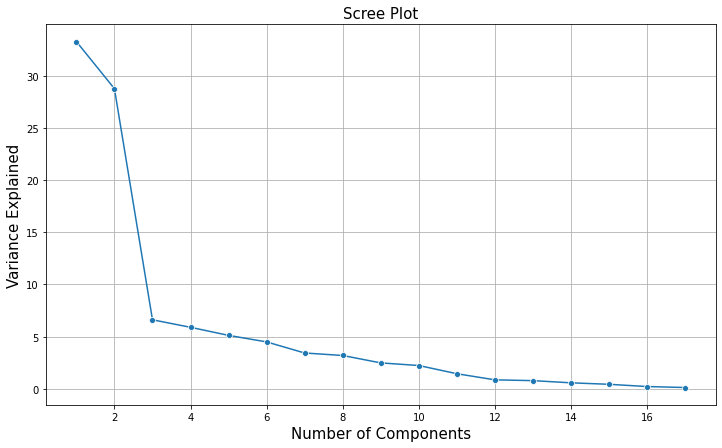

In [38]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

- **Visually we can observe that their is steep drop in variance explained with increase in number of PC's.**
- **Looking at the above plots and the Cumulative variance explained, Depending on requirement 80% variation or 6 components will do good and if 90% data has to be covered then we can go with 9 Principle components**

## Plot Cumulative explained variance and individual explained variance vs Principal Components

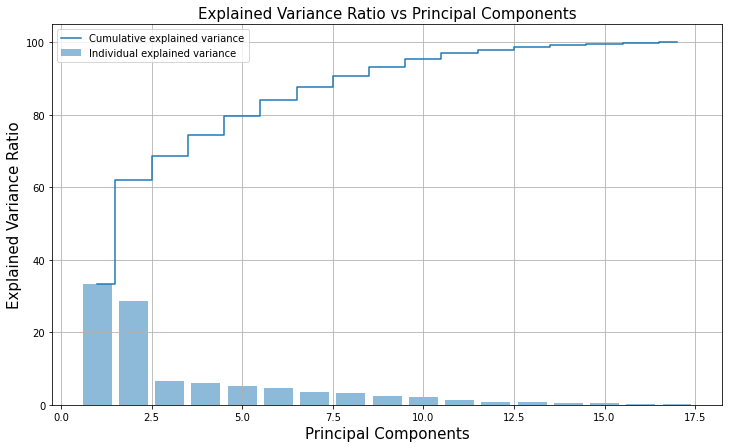

In [39]:
# Ploting 
plt.figure(figsize=(12 ,7))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio',fontsize=15)
plt.xlabel('Principal Components',fontsize=15)
plt.title('Explained Variance Ratio vs Principal Components',fontsize=15)
plt.legend(loc = 'best')
plt.grid()
plt.show()

## Use PCA  from sklearn's decomposition class and find Principal Components

In [40]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 4 PCA dimensions (dimensionality reduction from 18 to 6)

pca = PCA(n_components=6) # Instanciating
data_reduced = pca.fit_transform(df_new)
data_reduced

array([[-1.60249937,  0.99368301,  0.03004478, -1.00842228, -0.36688617,
        -0.69747574],
       [-1.80467545, -0.07041499,  2.1221275 ,  3.13894097,  2.4532118 ,
         0.99485839],
       [-1.60828257, -1.38279212, -0.50151255, -0.03637346,  0.76599685,
        -1.02623665],
       ...,
       [-0.57688267,  0.01779846,  0.32216033, -0.58725878,  0.17522456,
         0.50404276],
       [ 6.570952  , -1.18493014,  1.32596568,  0.07770749,  1.36851684,
        -0.8227453 ],
       [-0.47739307,  1.04394672, -1.42543835, -1.30027365,  0.72091762,
         1.05180972]])

In [41]:
# PCA Loadings
pca.components_

array([[ 2.62171542e-01,  2.30562461e-01,  1.89276397e-01,
         3.38874521e-01,  3.34690532e-01,  1.63293010e-01,
         2.24797091e-02,  2.83547285e-01,  2.44186588e-01,
         9.67082754e-02, -3.52299594e-02,  3.26410696e-01,
         3.23115980e-01, -1.63151642e-01,  1.86610828e-01,
         3.28955847e-01,  2.38822447e-01],
       [ 3.14136258e-01,  3.44623583e-01,  3.82813322e-01,
        -9.93191661e-02, -5.95055011e-02,  3.98636372e-01,
         3.57550046e-01, -2.51863617e-01, -1.31909124e-01,
         9.39739472e-02,  2.32439594e-01,  5.51390195e-02,
         4.30332048e-02,  2.59804556e-01, -2.57092552e-01,
        -1.60008951e-01, -1.67523664e-01],
       [-8.10177238e-02, -1.07658627e-01, -8.55296874e-02,
         7.88293847e-02,  5.07938248e-02, -7.37077840e-02,
        -4.03568700e-02, -1.49394794e-02,  2.11379165e-02,
         6.97121128e-01,  5.30972806e-01, -8.11134044e-02,
        -5.89785929e-02, -2.74150657e-01, -1.03715887e-01,
         1.84205687e-01, -2.4

In [42]:
pca.explained_variance_ratio_

array([0.33266084, 0.28755345, 0.06617164, 0.05898144, 0.05123893,
       0.04498639])

In [43]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([33.3, 62.1, 68.7, 74.6, 79.7, 84.2])

**The Cumulative % gives the percentage of variance accounted for by the n components. For example, the cumulative percentage for the second component is the sum of the percentage of variance for the first and second components. It helps in deciding the number of components by selecting the components which explained the high variance.**

**In the above array we see that the first feature explains 33.3% of the variance within our data set while the first two explain 62.1% and so on. If we employ 6 features we capture ~ 84% of the variance within the dataset**

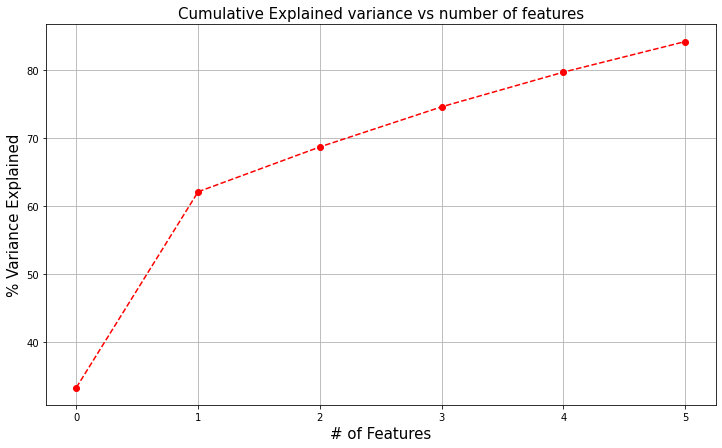

In [44]:
plt.figure(figsize=(12,7))
plt.plot(var, marker='o',linestyle='--',color='red')
plt.ylabel('% Variance Explained',fontsize=15)
plt.xlabel('# of Features',fontsize=15)
plt.title('Cumulative Explained variance vs number of features',fontsize=15)
plt.grid()
plt.show()

# Correlation between components and features

In [45]:
df_comp = pd.DataFrame(pca.components_,columns=list(df_new))
df_comp.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.262172  0.230562  0.189276   0.338875   0.334691     0.163293   
1  0.314136  0.344624  0.382813  -0.099319  -0.059506     0.398636   
2 -0.081018 -0.107659 -0.085530   0.078829   0.050794    -0.073708   
3  0.098776  0.118140  0.009307  -0.369115  -0.416824     0.013950   
4  0.219898  0.189635  0.162315   0.157211   0.144449     0.102728   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.022480  0.283547    0.244187  0.096708 -0.035230  0.326411  0.323116   
1     0.357550 -0.251864   -0.131909  0.093974  0.232440  0.055139  0.043033   
2    -0.040357 -0.014939    0.021138  0.697121  0.530973 -0.081113 -0.058979   
3     0.225351  0.262975    0.580894 -0.036156 -0.114983 -0.147261 -0.089008   
4    -0.095679  0.037275   -0.069108  0.035406 -0.000475 -0.550787 -0.590407   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.163152     0.186611  0.328956   0.238822  
1   0.259805    -0.257093 -0.160009  -0.167524  
2  -0.274151    -0.103716  0.184206  -0.245336  
3  -0.259486    -0.223982  0.213756  -0.036192  
4  -0.142843     0.128216 -0.022424   0.356843

In [46]:
from matplotlib.patches import Rectangle

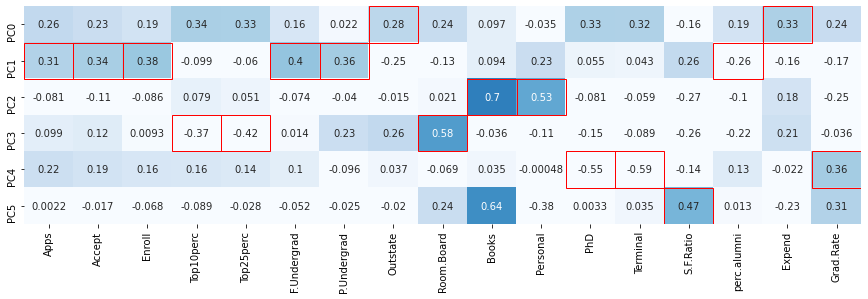

In [47]:
fig, ax = plt.subplots(figsize=(15,4), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_comp, annot=True, vmax=1, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                yticklabels=['PC0','PC1','PC2', 'PC3', 'PC4', 'PC5'])

column_max = df_comp.abs().idxmax(axis=0)

for col, variable in enumerate(df_comp.columns):
    position = df_comp.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position), 1, 1, fill=False, edgecolor='red', lw=1))

In [48]:
data_reduced1 = pd.DataFrame(data_reduced)
data_reduced1.head(10)

0         1         2         3         4         5
0 -1.602499  0.993683  0.030045 -1.008422 -0.366886 -0.697476
1 -1.804675 -0.070415  2.122127  3.138941  2.453212  0.994858
2 -1.608283 -1.382792 -0.501513 -0.036373  0.765997 -1.026237
3  2.803644 -3.367395  0.367768 -0.632915 -1.192601 -1.457080
4 -2.200868 -0.099348  3.122523  0.657707 -1.828044  0.140915
5 -0.730164 -1.998741  0.237171 -0.312879  0.062740 -0.821044
6  0.004516 -1.884603  0.237183  0.857612 -1.878437 -0.132645
7  1.836067 -1.733341 -0.995891 -0.521397 -0.996701 -0.117335
8  0.619231 -2.459100 -1.823771  0.329401 -0.341261 -0.977575
9 -2.934353 -1.106131  2.142631  0.235399  1.926359 -0.320840

In [49]:
data_reduced1.shape

(777, 6)

In [50]:
data_reduced1.columns = ['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5']

In [51]:
data_reduced1.head(10)

PC0       PC1       PC2       PC3       PC4       PC5
0 -1.602499  0.993683  0.030045 -1.008422 -0.366886 -0.697476
1 -1.804675 -0.070415  2.122127  3.138941  2.453212  0.994858
2 -1.608283 -1.382792 -0.501513 -0.036373  0.765997 -1.026237
3  2.803644 -3.367395  0.367768 -0.632915 -1.192601 -1.457080
4 -2.200868 -0.099348  3.122523  0.657707 -1.828044  0.140915
5 -0.730164 -1.998741  0.237171 -0.312879  0.062740 -0.821044
6  0.004516 -1.884603  0.237183  0.857612 -1.878437 -0.132645
7  1.836067 -1.733341 -0.995891 -0.521397 -0.996701 -0.117335
8  0.619231 -2.459100 -1.823771  0.329401 -0.341261 -0.977575
9 -2.934353 -1.106131  2.142631  0.235399  1.926359 -0.320840

In [52]:
corr = data_reduced1.corr()
corr


PC0           PC1           PC2           PC3           PC4  \
PC0  1.000000e+00 -1.413135e-18  1.659859e-17 -3.756264e-17  3.917419e-17   
PC1 -1.413135e-18  1.000000e+00 -1.474553e-17  2.052345e-17 -5.546430e-17   
PC2  1.659859e-17 -1.474553e-17  1.000000e+00  1.092453e-16 -1.128785e-16   
PC3 -3.756264e-17  2.052345e-17  1.092453e-16  1.000000e+00  2.816257e-16   
PC4  3.917419e-17 -5.546430e-17 -1.128785e-16  2.816257e-16  1.000000e+00   
PC5  1.181755e-17  1.112924e-16 -1.814718e-16 -2.839169e-16 -6.757515e-17   

              PC5  
PC0  1.181755e-17  
PC1  1.112924e-16  
PC2 -1.814718e-16  
PC3 -2.839169e-16  
PC4 -6.757515e-17  
PC5  1.000000e+00

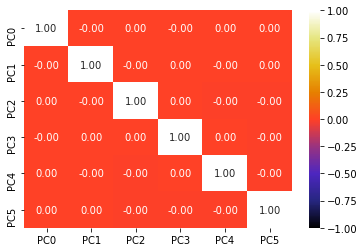

In [53]:
sns.heatmap(corr, annot=True,fmt='.2f',cmap='CMRmap', vmin=-1, vmax=1)

In [54]:
data_reduced1.head(10)

PC0       PC1       PC2       PC3       PC4       PC5
0 -1.602499  0.993683  0.030045 -1.008422 -0.366886 -0.697476
1 -1.804675 -0.070415  2.122127  3.138941  2.453212  0.994858
2 -1.608283 -1.382792 -0.501513 -0.036373  0.765997 -1.026237
3  2.803644 -3.367395  0.367768 -0.632915 -1.192601 -1.457080
4 -2.200868 -0.099348  3.122523  0.657707 -1.828044  0.140915
5 -0.730164 -1.998741  0.237171 -0.312879  0.062740 -0.821044
6  0.004516 -1.884603  0.237183  0.857612 -1.878437 -0.132645
7  1.836067 -1.733341 -0.995891 -0.521397 -0.996701 -0.117335
8  0.619231 -2.459100 -1.823771  0.329401 -0.341261 -0.977575
9 -2.934353 -1.106131  2.142631  0.235399  1.926359 -0.320840

In [57]:
final_data = pd.concat([df3['Names'], data_reduced1], axis=1)

In [58]:
final_data.head()

Names       PC0       PC1       PC2       PC3  \
0  Abilene Christian University -1.602499  0.993683  0.030045 -1.008422   
1            Adelphi University -1.804675 -0.070415  2.122127  3.138941   
2                Adrian College -1.608283 -1.382792 -0.501513 -0.036373   
3           Agnes Scott College  2.803644 -3.367395  0.367768 -0.632915   
4     Alaska Pacific University -2.200868 -0.099348  3.122523  0.657707   

        PC4       PC5  
0 -0.366886 -0.697476  
1  2.453212  0.994858  
2  0.765997 -1.026237  
3 -1.192601 -1.457080  
4 -1.828044  0.140915

In [59]:
df4 = df3.copy()

In [60]:
df5 = df3.copy()

## PCA without Outlier treatment

In [61]:
df4=df4.drop(["Names"],axis=1)

In [62]:
df4.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

In [63]:
# All variables must be on same scale,
# Standardization
from scipy.stats import zscore
df4_new=df4.apply(zscore)
df4_new.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

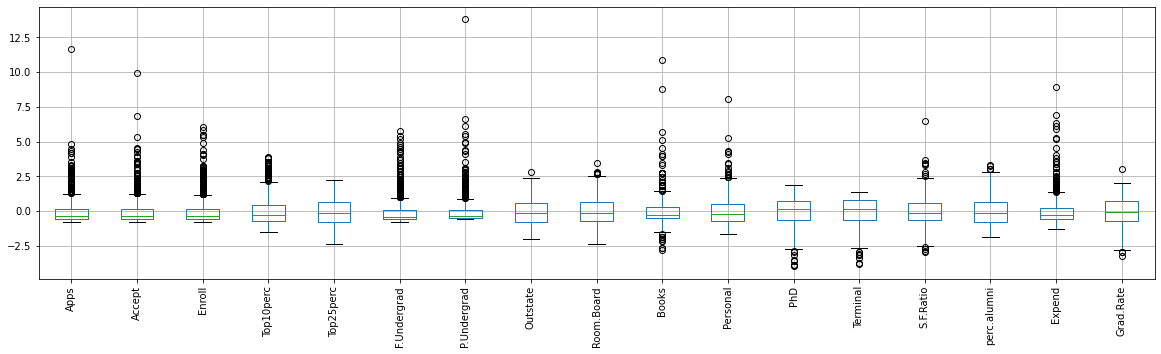

In [64]:
df4_new.boxplot(figsize=(20,5))
plt.xticks(rotation=90)
plt.show()

In [65]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_sq_value, p_value = calculate_bartlett_sphericity(df4_new)
p_value

0.0

In [66]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df4_new)
print(kmo_model)

0.8131251200373522


In [67]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(df4_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [68]:
#Even if we take the transpose of the covariance matrix it results in same value as that of the above
cov_matrix = np.cov(df4_new.T).T
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441  

In [69]:
df4_new.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

In [70]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [5.45052162 4.48360686 1.17466761 1.00820573 0.93423123 0.84849117
 0.6057878  0.58787222 0.53061262 0.4043029  0.02302787 0.03672545
 0.31344588 0.08802464 0.1439785  0.16779415 0.22061096]


Eigen Vectors 
 %s [[-2.48765602e-01  3.31598227e-01  6.30921033e-02 -2.81310530e-01
   5.74140964e-03  1.62374420e-02  4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01  1.01249056e-01 -2.67817346e-01
   5.57860920e-02 -7.53468452e-03  1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01  8.29855709e-02 -1.61826771e-01
  -5.56936353e-02  4.25579803e-02  2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6

In [71]:
eig_vecs[0]

array([-0.2487656 ,  0.33159823,  0.0630921 , -0.28131053,  0.00574141,
        0.01623744,  0.04248635,  0.1030904 ,  0.09022708, -0.0525098 ,
        0.3589704 , -0.4591395 ,  0.04304621, -0.13340581,  0.0806328 ,
       -0.59583097,  0.02407091])

In [72]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


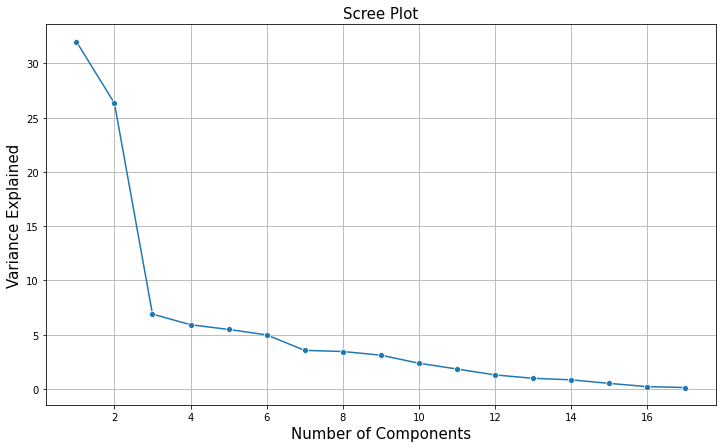

In [73]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

- **Visually we can observe that their is steep drop in variance explained with increase in number of PC's.**
- **Looking at the above plots and the Cumulative variance explained, Depending on requirement 80% variation or 6 components will do good and if 90% data has to be covered then we can go with 9 Principle components**

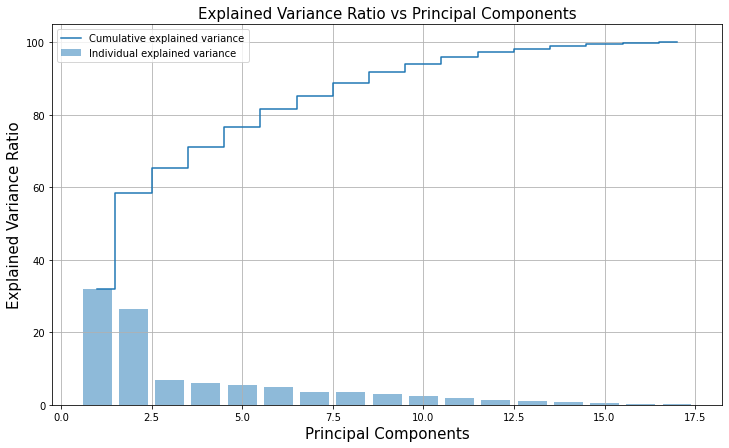

In [74]:
# Ploting 
plt.figure(figsize=(12 ,7))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio',fontsize=15)
plt.xlabel('Principal Components',fontsize=15)
plt.title('Explained Variance Ratio vs Principal Components',fontsize=15)
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [75]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 6 PCA dimensions (dimensionality reduction from 18 to 6)

pca = PCA(n_components=6) # Instanciating
data_reduced = pca.fit_transform(df4_new)
data_reduced

array([[-1.59285540e+00,  7.67333510e-01, -1.01073531e-01,
        -9.21749394e-01, -7.43975463e-01, -2.98306117e-01],
       [-2.19240180e+00, -5.78829984e-01,  2.27879810e+00,
         3.58891822e+00,  1.05999678e+00, -1.77137212e-01],
       [-1.43096371e+00, -1.09281889e+00, -4.38092811e-01,
         6.77240528e-01, -3.69613277e-01, -9.60591690e-01],
       ...,
       [-7.32560596e-01, -7.72352397e-02, -4.05657377e-04,
         5.43162726e-02, -5.16020970e-01,  4.68014330e-01],
       [ 7.91932735e+00, -2.06832886e+00,  2.07356372e+00,
         8.52054017e-01, -9.47755129e-01, -2.06993759e+00],
       [-4.69508066e-01,  3.66660943e-01, -1.32891515e+00,
        -1.08022558e-01, -1.13217591e+00,  8.39893104e-01]])

In [76]:
# PCA Loadings
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.0630921 , -0.10124906, -0.08298557,  0.03505553, -0.02414794,
        -0.06139298,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131053,  0.26781735,  0.16182677, -0.05154725, -0.10976654,
         0.10041233, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.07927349

In [77]:
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701])

In [78]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([32. , 58.3, 65.2, 71.1, 76.6, 81.6])

**The Cumulative % gives the percentage of variance accounted for by the n components. For example, the cumulative percentage for the second component is the sum of the percentage of variance for the first and second components. It helps in deciding the number of components by selecting the components which explained the high variance.**

**In the above array we see that the first feature explains 32% of the variance within our data set while the first two explain 58% and so on. If we employ 6 features we capture ~ 82% of the variance within the dataset**

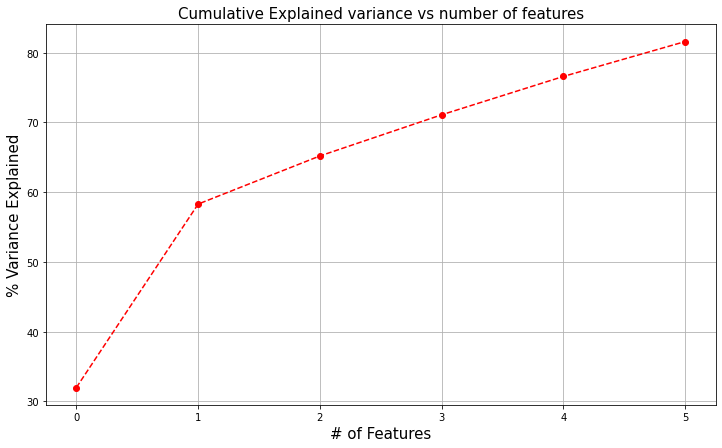

In [79]:
plt.figure(figsize=(12,7))
plt.plot(var, marker='o',linestyle='--',color='red')
plt.ylabel('% Variance Explained',fontsize=15)
plt.xlabel('# of Features',fontsize=15)
plt.title('Cumulative Explained variance vs number of features',fontsize=15)
plt.grid()
plt.show()

In [80]:
df_comp = pd.DataFrame(pca.components_,columns=list(df4_new))
df_comp.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.248766  0.207602  0.176304   0.354274   0.344001     0.154641   
1  0.331598  0.372117  0.403724  -0.082412  -0.044779     0.417674   
2 -0.063092 -0.101249 -0.082986   0.035056  -0.024148    -0.061393   
3  0.281311  0.267817  0.161827  -0.051547  -0.109767     0.100412   
4  0.005741  0.055786 -0.055694  -0.395434  -0.426534    -0.043454   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.026443  0.294736    0.249030  0.064758 -0.042529  0.318313  0.317056   
1     0.315088 -0.249644   -0.137809  0.056342  0.219929  0.058311  0.046429   
2     0.139682  0.046599    0.148967  0.677412  0.499721 -0.127028 -0.066038   
3    -0.158558  0.131291    0.184996  0.087089 -0.230711 -0.534725 -0.519443   
4     0.302385  0.222532    0.560919 -0.127289 -0.222311  0.140166  0.204720   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.176958     0.205082  0.318909   0.252316  
1   0.246665    -0.246595 -0.131690  -0.169241  
2  -0.289848    -0.146989  0.226744  -0.208065  
3  -0.161189     0.017314  0.079273   0.269129  
4  -0.079388    -0.216297  0.075958  -0.109268

In [81]:
from matplotlib.patches import Rectangle

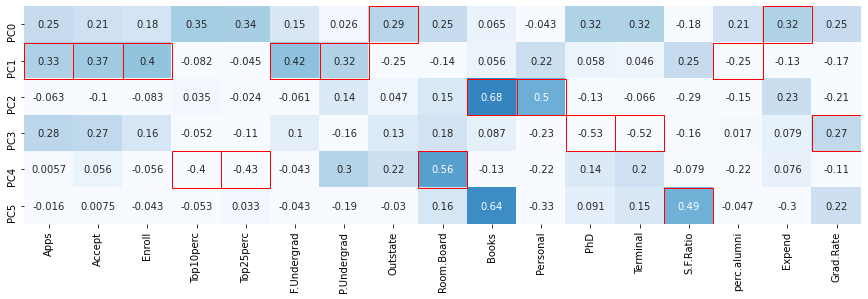

In [82]:
fig, ax = plt.subplots(figsize=(15,4), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_comp, annot=True, vmax=1, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                yticklabels=['PC0','PC1','PC2', 'PC3', 'PC4', 'PC5'])

column_max = df_comp.abs().idxmax(axis=0)

for col, variable in enumerate(df_comp.columns):
    position = df_comp.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position), 1, 1, fill=False, edgecolor='red', lw=1))

In [83]:
data_reduced1 = pd.DataFrame(data_reduced)
data_reduced1.head(10)

0         1         2         3         4         5
0 -1.592855  0.767334 -0.101074 -0.921749 -0.743975 -0.298306
1 -2.192402 -0.578830  2.278798  3.588918  1.059997 -0.177137
2 -1.430964 -1.092819 -0.438093  0.677241 -0.369613 -0.960592
3  2.855557 -2.630612  0.141722 -1.295486 -0.183837 -1.059508
4 -2.212008  0.021631  2.387030 -1.114538  0.684451  0.004918
5 -0.571665 -1.496325  0.024354  0.066944 -0.376261 -0.668343
6  0.241952 -1.506368  0.234194 -1.142024  1.546983 -0.009995
7  1.750474 -1.461412 -1.026589 -0.981184  0.217044  0.222924
8  0.769127 -1.984433 -1.426052 -0.071424  0.586380 -0.655179
9 -2.770721 -0.844611  1.627987  1.705091 -1.019826 -0.794401

In [84]:
data_reduced1.shape

(777, 6)

In [85]:
data_reduced1.columns = ['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5']

In [86]:
data_reduced1.head(10)

PC0       PC1       PC2       PC3       PC4       PC5
0 -1.592855  0.767334 -0.101074 -0.921749 -0.743975 -0.298306
1 -2.192402 -0.578830  2.278798  3.588918  1.059997 -0.177137
2 -1.430964 -1.092819 -0.438093  0.677241 -0.369613 -0.960592
3  2.855557 -2.630612  0.141722 -1.295486 -0.183837 -1.059508
4 -2.212008  0.021631  2.387030 -1.114538  0.684451  0.004918
5 -0.571665 -1.496325  0.024354  0.066944 -0.376261 -0.668343
6  0.241952 -1.506368  0.234194 -1.142024  1.546983 -0.009995
7  1.750474 -1.461412 -1.026589 -0.981184  0.217044  0.222924
8  0.769127 -1.984433 -1.426052 -0.071424  0.586380 -0.655179
9 -2.770721 -0.844611  1.627987  1.705091 -1.019826 -0.794401

In [87]:
corr = data_reduced1.corr()
corr


PC0           PC1           PC2           PC3           PC4  \
PC0  1.000000e+00  1.049551e-16  2.103366e-17 -8.277413e-17  2.047881e-17   
PC1  1.049551e-16  1.000000e+00  4.706783e-18  5.090601e-17  2.894062e-17   
PC2  2.103366e-17  4.706783e-18  1.000000e+00 -8.775416e-18 -4.681711e-16   
PC3 -8.277413e-17  5.090601e-17 -8.775416e-18  1.000000e+00  3.648564e-17   
PC4  2.047881e-17  2.894062e-17 -4.681711e-16  3.648564e-17  1.000000e+00   
PC5 -1.280668e-17 -1.896145e-17 -1.384345e-16 -2.892623e-17  7.231197e-16   

              PC5  
PC0 -1.280668e-17  
PC1 -1.896145e-17  
PC2 -1.384345e-16  
PC3 -2.892623e-17  
PC4  7.231197e-16  
PC5  1.000000e+00

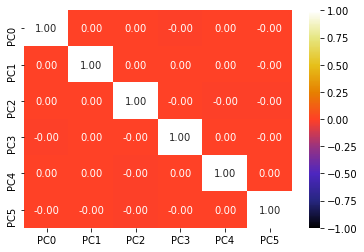

In [88]:
sns.heatmap(corr, annot=True,fmt='.2f',cmap='CMRmap', vmin=-1, vmax=1)

In [89]:
data_reduced1.head(10)

PC0       PC1       PC2       PC3       PC4       PC5
0 -1.592855  0.767334 -0.101074 -0.921749 -0.743975 -0.298306
1 -2.192402 -0.578830  2.278798  3.588918  1.059997 -0.177137
2 -1.430964 -1.092819 -0.438093  0.677241 -0.369613 -0.960592
3  2.855557 -2.630612  0.141722 -1.295486 -0.183837 -1.059508
4 -2.212008  0.021631  2.387030 -1.114538  0.684451  0.004918
5 -0.571665 -1.496325  0.024354  0.066944 -0.376261 -0.668343
6  0.241952 -1.506368  0.234194 -1.142024  1.546983 -0.009995
7  1.750474 -1.461412 -1.026589 -0.981184  0.217044  0.222924
8  0.769127 -1.984433 -1.426052 -0.071424  0.586380 -0.655179
9 -2.770721 -0.844611  1.627987  1.705091 -1.019826 -0.794401

In [90]:
final_data = pd.concat([df3['Names'], data_reduced1], axis=1)

In [92]:
final_data.head(10)

Names       PC0       PC1       PC2       PC3  \
0  Abilene Christian University -1.592855  0.767334 -0.101074 -0.921749   
1            Adelphi University -2.192402 -0.578830  2.278798  3.588918   
2                Adrian College -1.430964 -1.092819 -0.438093  0.677241   
3           Agnes Scott College  2.855557 -2.630612  0.141722 -1.295486   
4     Alaska Pacific University -2.212008  0.021631  2.387030 -1.114538   
5             Albertson College -0.571665 -1.496325  0.024354  0.066944   
6       Albertus Magnus College  0.241952 -1.506368  0.234194 -1.142024   
7                Albion College  1.750474 -1.461412 -1.026589 -0.981184   
8              Albright College  0.769127 -1.984433 -1.426052 -0.071424   
9     Alderson-Broaddus College -2.770721 -0.844611  1.627987  1.705091   

        PC4       PC5  
0 -0.743975 -0.298306  
1  1.059997 -0.177137  
2 -0.369613 -0.960592  
3 -0.183837 -1.059508  
4  0.684451  0.004918  
5 -0.376261 -0.668343  
6  1.546983 -0.009995  
7  0.217044  0.222924  
8  0.586380 -0.655179  
9 -1.019826 -0.794401